# Multiple files with `pandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib


In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


In [9]:
inner_merged_df = a_df.merge(b_df, on = "Country")

In [13]:
left_merged_df = a_df.merge(b_df, how = 'left', on = "Country")
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


In [15]:
right_merged_df = a_df.merge(b_df, how = 'right', on = "Country")
right_merged_df 

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


In [16]:
outer_merged_df = a_df.merge(b_df, how = 'outer', on = "Country")
outer_merged_df 

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [17]:
outer_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5 non-null      object 
 1   Population (M)  4 non-null      float64
 2   Capital         4 non-null      object 
 3   HDI             4 non-null      float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


In [18]:
aa_df = a_df.set_index("Country")
aa_df
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [19]:
aa_df.join(bb_df)

,Population (M),Capital,HDI
Country,,,
Germany,82.8,Berlin,0.936
France,67.2,Paris,0.901
Belgium,11.4,Brussels,0.916
Finland,5.5,Helsinki,NaN


In [37]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Code,Population,GDP per Capita,HDI
0,Afghanistan,AFG,32526562.0,594.323081,NaN
1,Albania,ALB,2889167.0,3945.217582,NaN
2,Algeria,ALG,39666519.0,4206.031232,NaN
3,American Samoa*,ASA,55538.0,NaN,NaN
4,Andorra,AND,70473.0,NaN,NaN
...,...,...,...,...,...
200,Zimbabwe,ZIM,15602751.0,924.143819,NaN
0,Germany,NaN,NaN,NaN,0.936
1,France,NaN,NaN,NaN,0.901
2,Belgium,NaN,NaN,NaN,0.916


# the real part of the excercize, medals

In [132]:
countries_df = pd.read_csv('dictionary.csv')

In [133]:
summer_df  = pd.read_csv('summer.csv')

In [134]:
summer_df = summer_df.rename(columns = {'Country' : 'Code'})

In [135]:
summer_countries = countries_df.merge(summer_df, on = 'Code', how = 'left')
summer_countries

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,Afghanistan,AFG,32526562.0,594.323081,2008.0,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze
1,Afghanistan,AFG,32526562.0,594.323081,2012.0,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze
2,Albania,ALB,2889167.0,3945.217582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,ALG,39666519.0,4206.031232,1984.0,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze
4,Algeria,ALG,39666519.0,4206.031232,1984.0,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
25809,Zimbabwe,ZIM,15602751.0,924.143819,2004.0,Athens,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Bronze
25810,Zimbabwe,ZIM,15602751.0,924.143819,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,100M Backstroke,Silver
25811,Zimbabwe,ZIM,15602751.0,924.143819,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Backstroke,Gold
25812,Zimbabwe,ZIM,15602751.0,924.143819,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Silver


In [136]:
winter_df = pd.read_csv('winter.csv')

In [137]:
winter_df = winter_df.rename(columns = {'Country' : 'Code'})
winter_df

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [138]:
winter_countries = countries_df.merge(winter_df, on = 'Code', how = 'right')
winter_countries

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,France,FRA,66808385.0,36205.568102,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",Men,Military Patrol,Bronze
1,France,FRA,66808385.0,36205.568102,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",Men,Military Patrol,Bronze
2,France,FRA,66808385.0,36205.568102,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",Men,Military Patrol,Bronze
3,France,FRA,66808385.0,36205.568102,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",Men,Military Patrol,Bronze
4,France,FRA,66808385.0,36205.568102,1924,Chamonix,Curling,Curling,"ALDEERT, H.",Men,Curling,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
5765,Slovakia,SVK,5424050.0,16088.277587,2006,Turin,Skiing,Snowboard,"ZIDEK, Radoslav",Men,Snowboard Cross,Silver
5766,Slovakia,SVK,5424050.0,16088.277587,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",Women,10KM Pursuit,Silver
5767,Slovakia,SVK,5424050.0,16088.277587,2010,Vancouver,Biathlon,Biathlon,"HURAJT, Pavol",Men,15KM Mass Start,Bronze
5768,Slovakia,SVK,5424050.0,16088.277587,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",Women,7.5KM,Gold


In [139]:
winter_countries['season'] = 'winter'
summer_countries['season'] = 'summer'
summer_countries

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,season
0,Afghanistan,AFG,32526562.0,594.323081,2008.0,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,summer
1,Afghanistan,AFG,32526562.0,594.323081,2012.0,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,summer
2,Albania,ALB,2889167.0,3945.217582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,summer
3,Algeria,ALG,39666519.0,4206.031232,1984.0,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,summer
4,Algeria,ALG,39666519.0,4206.031232,1984.0,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25809,Zimbabwe,ZIM,15602751.0,924.143819,2004.0,Athens,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Bronze,summer
25810,Zimbabwe,ZIM,15602751.0,924.143819,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,100M Backstroke,Silver,summer
25811,Zimbabwe,ZIM,15602751.0,924.143819,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Backstroke,Gold,summer
25812,Zimbabwe,ZIM,15602751.0,924.143819,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",Women,200M Individual Medley,Silver,summer


In [159]:
all_df = pd.concat([summer_countries, winter_countries], axis="index", sort=False)

In [161]:
all_df.shape

(31584, 13)

In [162]:
all_df = all_df.dropna(subset = ['Year'])

In [187]:
all_df_1984 = all_df[all_df['Year']>=1984] 

In [190]:
top_10 = all_df_1984['Code'].value_counts().head(10)

Text(0, 0.5, 'Number of medals won since 1984')

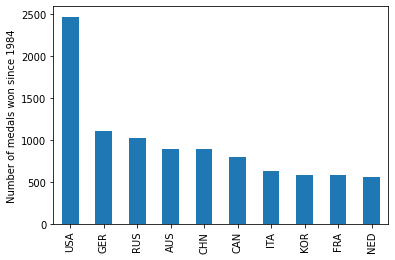

In [201]:
medal_plot = top_10.plot(kind = 'bar')
medal_plot.set_ylabel('Number of medals won since 1984')

In [202]:
unstacked_all = all_df_1984.unstack()

In [203]:
all_df_1984['Code'].value_counts().head(10)

Country  0    Afghanistan
         1    Afghanistan
         3        Algeria
         4        Algeria
         5        Algeria
dtype: object

In [223]:
med = all_df_1984.groupby(['Code', 'season'])
cnt = med[['Code']].count()
medal_count = cnt.rename(columns = {'Code' : 'Count'})

In [226]:
medal_count.sort_values('Count', ascending=False)

,,Count
Code,season,
USA,summer,2087
AUS,summer,876
CHN,summer,807
GER,summer,785
RUS,summer,768
...,...,...
SUD,summer,1
GRN,summer,1
ERI,summer,1


In [229]:
unstacked_df = medal_count.unstack()
unstacked_df

Count       
season summer winter
Code                
AFG       2.0    NaN
AHO       1.0    NaN
ALG      15.0    NaN
ARG     173.0    NaN
ARM      11.0    NaN
...       ...    ...
VEN       7.0    NaN
VIE       2.0    NaN
YUG       NaN    7.0
ZAM       2.0    NaN
ZIM       7.0    NaN

[129 rows x 2 columns]

In [237]:
unstacked_df = unstacked_df.fillna(0)

In [238]:
unstacked_df['Total'] = unstacked_df['Count']['summer'] + unstacked_df['Count']['winter']

In [239]:
unstacked_df

Count         Total
season summer winter       
Code                       
AFG       2.0    0.0    2.0
AHO       1.0    0.0    1.0
ALG      15.0    0.0   15.0
ARG     173.0    0.0  173.0
ARM      11.0    0.0   11.0
...       ...    ...    ...
VEN       7.0    0.0    7.0
VIE       2.0    0.0    2.0
YUG       0.0    7.0    7.0
ZAM       2.0    0.0    2.0
ZIM       7.0    0.0    7.0

[129 rows x 3 columns]

In [243]:
top10_combined = unstacked_df.sort_values('Total', ascending=False).head(10)

Text(0, 0.5, 'Number of medals won since 1984')

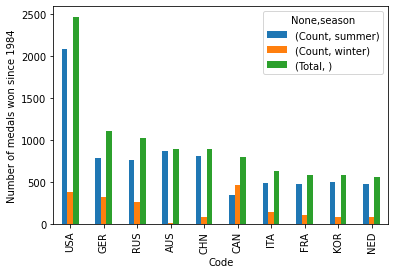

In [245]:
medal_plot = top10_combined.plot(kind = 'bar')
medal_plot.set_ylabel('Number of medals won since 1984')